# Blurbs

Short pieces of content for social media

In [ ]:
import pandas as pd

In [ ]:
emp = pd.read_csv('data/employee.csv')
emp.head()

In [ ]:
sal = emp['salary']

In [ ]:
sal.head()

In [ ]:
sal.mean()

![0]

[0]: images/confusing_axis_parameter_series.png

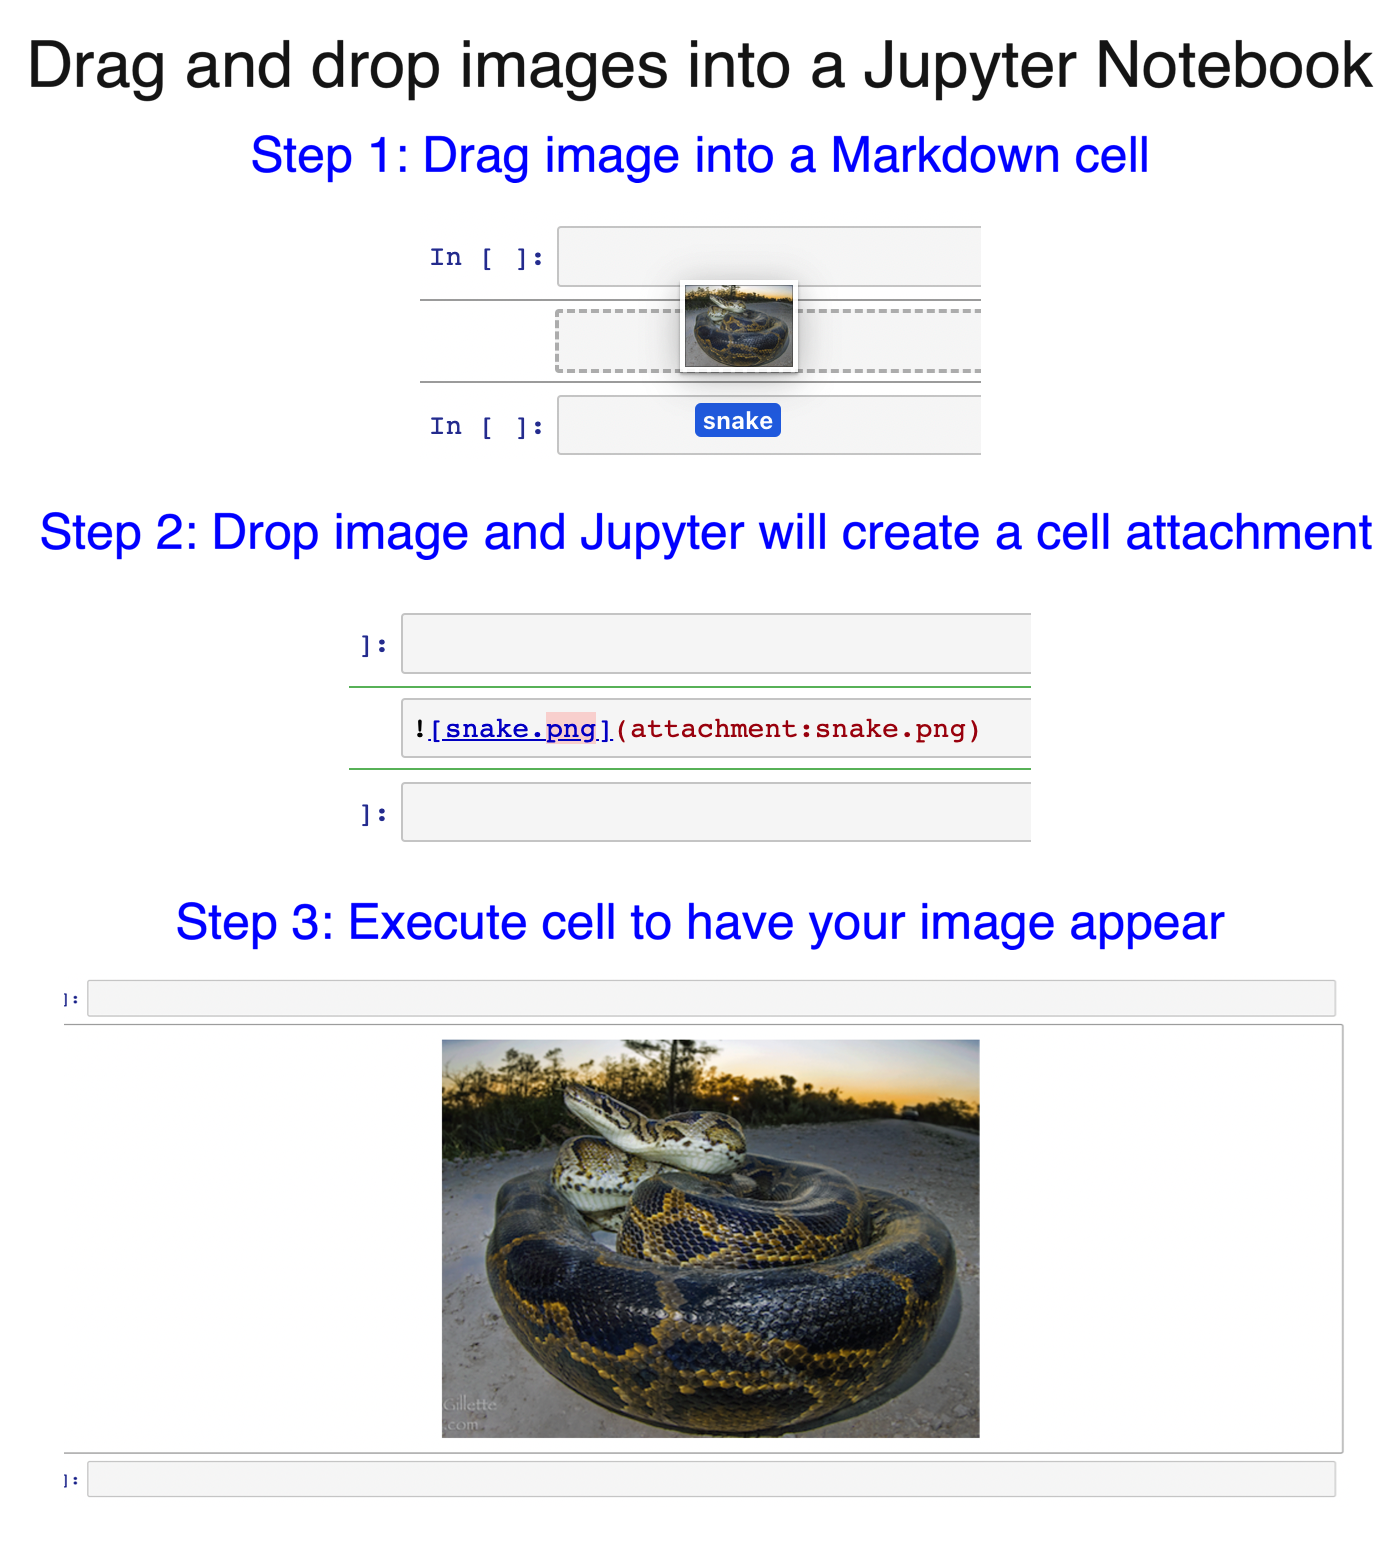

## Finding the Percentage of Missing Values in All Columns

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/college.csv').drop(columns=['ugds_white', 'city',
                                                   'ugds_black', 'ugds_hisp', 'ugds_asian', 'ugds_aian',
       'ugds_nhpi', 'ugds_2mor', 'ugds_nra', 'ugds_unkn']).iloc[:, :8]

df.iloc[1, 4] = np.nan
df.iloc[2, [3, 5]] = np.nan

# Finding the Percentage of Missing Values in All Columns of a Pandas Dataframe

 <br><br> <br><br> <br><br> 

In [ ]:
df.head(3)

In [ ]:
df.isna().head(3)

In [ ]:
df.isna().mean()

In [ ]:
df.isna().mean().round(3) * 100

## Quickly Create Test DataFrames with `pd._testing.make*` functions

In [ ]:
pd._testing.makeDataFrame()

In [ ]:
pd._testing.makePeriodFrame()

In [ ]:
movie = pd.read_csv('data/movie.csv', usecols=['title', 'genres', 'content_rating']).dropna().reset_index(drop=True)

In [ ]:
movie = movie.query('title.str.len() < 10 and genres.str.count("\|") < 4').reset_index(drop=True)

## Split multiple pieces of data in a cell into individual columns

In [ ]:
movie.head(3)

In [ ]:
genres = movie['genres'].str.split('|', expand=True)
genres.head(3)

In [ ]:
genres = genres.rename(columns={col: f'genre_{col + 1}' for col in genres.columns})
genres.head(3)

In [ ]:
pd.concat([movie, genres], axis=1).head(3)

In [ ]:
movie = pd.read_csv('data/movie.csv', usecols=['title', 'genres', 'content_rating']).dropna().reset_index(drop=True)

## Use string only methods within DataFrame query

Use the `str` accessor within the `query` method

In [ ]:
movie.head()

Select titles with length less than 10 and genres with less than three pipe symbols

In [ ]:
movie.query('title.str.len() < 10 and genres.str.count("\|") < 3').head()

Without query

In [ ]:
filt = (movie['title'].str.len() < 10) & (movie['genres'].str.count("\|") < 3)
movie[filt].head()

In [ ]:
import pandas as pd

In [ ]:
df.to_csv('data/fruits.csv', index=False)

# Pandas Quiz 

## Can you convert this DataFrame to its final form?

In [ ]:
df = pd.read_csv('data/fruits.csv')
df

In [ ]:
df.set_index('name')['fruits'].str.get_dummies('|')

In [ ]:
(df.set_index('name')['fruits']
   .str.split('|', expand=True)
   .stack()
   .droplevel(1)
   .reset_index(name='fruits')
   .assign(val=1)
   .pivot(index='name', columns='fruits', values='val')
   .fillna(0)
   .astype('int64')
)

In [ ]:
import pandas as pd

# Pandas Quiz - How many days did Chicago have at least one hour where its temperature was warmer than Houston?

Hourly temperature (in Celsius) data from 10 different cities from 2013-16

In [ ]:
df = pd.read_csv('data/weather/temperature.csv', 
                 parse_dates=['datetime'],
                 index_col='datetime')
df.head()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tdpetrou/Learn-Pandas/master/data/weather/temperature.csv')

In [ ]:
(df['Chicago'] > df['Houston']).resample('D').max().sum()

In [ ]:
import pandas as pd

## Pickle pandas DataFrame to get index names correct

In [1]:
import pandas as pd
df = pd.read_csv('data/diamonds.csv')

df['clarity'] = df['clarity'].astype(pd.CategoricalDtype(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']))
df['cut'] = df['cut'].astype(pd.CategoricalDtype(['Good', 'Very Good', 'Premium']))
df['color'] = df['color'].astype(pd.CategoricalDtype(['F', 'E', 'D']))

df = df.query('cut in ["Good", "Very Good", "Premium"] and color in ["D", "E", "F"] and clarity in ["SI1", "VS2", "VS1", "VVS2", "VVS1"]')

# Need to Save a MultiIndex DataFrame? Use Pickle

* When you create a complex DataFrame with multiple index levels and names, saving as a CSV will make it hard to read it back in as the same DataFrame
* Instead, save it as a pickle with `to_pickle` to save the exact same DataFrame as in your notebook

In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
21,0.23,Very Good,E,VS2,63.8,55.0,352,3.85,3.92,2.48
28,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40


In [3]:
result = df.pivot_table(index=['cut', 'color'], 
                        columns=['clarity'], 
                        values='price', 
                        aggfunc='mean').round(-2)
result

clarity             SI1     VS2     VS1    VVS2    VVS1
cut       color                                        
Good      F      3300.0  3800.0  2800.0  3200.0  2200.0
          E      3200.0  3800.0  3700.0  3400.0  1900.0
          D      3000.0  3600.0  3600.0  2300.0  2600.0
Very Good F      3600.0  4000.0  3900.0  3500.0  2800.0
          E      3200.0  3300.0  3100.0  2000.0  2000.0
          D      3200.0  3100.0  3000.0  2600.0  3000.0
Premium   F      4000.0  4200.0  4800.0  4100.0  4000.0
          E      3400.0  3100.0  3700.0  2900.0  2700.0
          D      3200.0  2900.0  4200.0  3900.0  3800.0

In [4]:
result.to_csv('result.csv')
pd.read_csv('result.csv')

,cut,color,SI1,VS2,VS1,VVS2,VVS1
0,Good,F,3300.0,3800.0,2800.0,3200.0,2200.0
1,Good,E,3200.0,3800.0,3700.0,3400.0,1900.0
2,Good,D,3000.0,3600.0,3600.0,2300.0,2600.0
3,Very Good,F,3600.0,4000.0,3900.0,3500.0,2800.0
4,Very Good,E,3200.0,3300.0,3100.0,2000.0,2000.0
5,Very Good,D,3200.0,3100.0,3000.0,2600.0,3000.0
6,Premium,F,4000.0,4200.0,4800.0,4100.0,4000.0
7,Premium,E,3400.0,3100.0,3700.0,2900.0,2700.0
8,Premium,D,3200.0,2900.0,4200.0,3900.0,3800.0


In [5]:
result.to_pickle('result.pkl')
pd.read_pickle('result.pkl')

clarity             SI1     VS2     VS1    VVS2    VVS1
cut       color                                        
Good      F      3300.0  3800.0  2800.0  3200.0  2200.0
          E      3200.0  3800.0  3700.0  3400.0  1900.0
          D      3000.0  3600.0  3600.0  2300.0  2600.0
Very Good F      3600.0  4000.0  3900.0  3500.0  2800.0
          E      3200.0  3300.0  3100.0  2000.0  2000.0
          D      3200.0  3100.0  3000.0  2600.0  3000.0
Premium   F      4000.0  4200.0  4800.0  4100.0  4000.0
          E      3400.0  3100.0  3700.0  2900.0  2700.0
          D      3200.0  2900.0  4200.0  3900.0  3800.0